# ANALYSE PAR LEAGUE

## I - Description du Problème

Dans ce notebook, on va analyser la distribution des données par league, ainsi que voir si le fait qu'un équipe joue chez lui donne un avantage à cet équipe pour gagner.

## II - Préparation des données

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
match = pd.DataFrame(data=pd.read_csv("./donnees_soccer/match.csv", sep=","))
league = pd.DataFrame(data=pd.read_csv("./donnees_soccer/league.csv", sep=","))
#Jointure
match=pd.merge(league,match,left_on = 'id', right_on ='league_id')

## III - Protocole expérimentale

### A - Distribution des données (matchs) selon les leagues

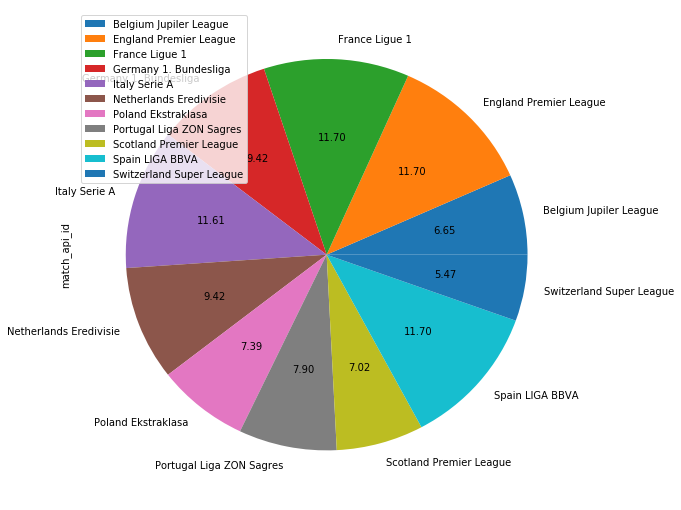

In [12]:
#delete les doublons d'un match
match_nd=match.drop_duplicates(subset="match_api_id")
#caluler le nombre des matchs par league
match_nd=match_nd[['name',"match_api_id"]].groupby('name').count()
match_nd.plot(kind='pie', subplots=True, figsize=(9, 9),autopct='%.2f')
plt.show()

### B - Home Team Advantage Par league (Est-ce que le fait qu'on joue chez nous nous donne un avantage ?)

In [13]:
#On calucule la moyenne des goals par league
moy_goals = match[['name','home_team_goal','away_team_goal']].groupby('name').mean()

In [14]:
"""Maintenat qu'on a la moyenne de home_goals et away_goals par league,
on peut calculer la pourcentage en divisant par la somme et on multiple par 100"""

total_goals = moy_goals['home_team_goal'] + moy_goals['away_team_goal']
moy_goals['home_team_goal_percent'] = 100 * moy_goals['home_team_goal'] / total_goals
moy_goals['away_team_goal_percent'] = 100 * moy_goals['away_team_goal'] / total_goals

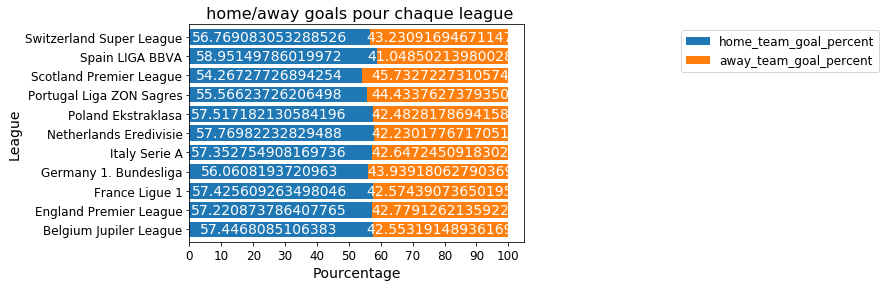

In [15]:
plot_goals = moy_goals[['home_team_goal_percent','away_team_goal_percent']]

plot = plot_goals.plot(kind='barh', stacked=True, legend = False,
                                   fontsize = 12, width = 0.8, xticks = np.arange(0,100.1,10))

plot.set_xlabel('Pourcentage', fontsize = 14)
plot.set_ylabel('League', fontsize = 14)
plot.set_title(' home/away goals pour chaque league', fontsize = 16)

# plot numbers in plot
k = 0
for index, row in plot_goals.iterrows():
      
    plot.text(x = 25, y = k, s = row['home_team_goal_percent'], color = 'white', fontsize = 14, ha = 'center', va = 'center')
    plot.text(x = 80, y = k, s = row['away_team_goal_percent'], color = 'white', fontsize = 14, ha = 'center', va = 'center')
    k += 1
    
plt.legend(bbox_to_anchor=(1.45,1), fontsize = 12)
plt.show()

## IV - Résultats et Conclusion

D'apres le diagramme, les chiffres montrent qu'il vaut mieux jouer chez soi pour gagner, puisque le pourcentage des goals des home team est plus grand que celui des away team dans tous les leagues. Donc quand un équipe joue chez lui, il a toujours un avantage sur l'équipe adversaire qui vient de l'extérieur.
Plusieurs raisons peuvent être avancées comme la connaissance du stade, les supporteurs ou encore une confiance plus grande.